# 📊 Exploratory Data Analysis (EDA)

This notebook performs EDA on stock price data fetched using `yfinance`.  
We visualize the closing prices, moving averages, and trading volume.


In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load stock data
ticker = 'RELIANCE.NS'
df = yf.download(ticker, start='2018-01-01', end='2025-01-01')
df.head()


C:\Users\sneha\AppData\Local\Temp\ipykernel_23908\245024577.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2018-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2018-01-01,403.469788,409.213035,402.471922,409.213035,9453202
2018-01-02,404.090698,407.816071,401.984097,404.911171,9499419
2018-01-03,405.709473,410.676626,404.933348,410.233114,13507800
2018-01-04,408.148682,408.813935,406.108602,407.195164,9008932
2018-01-05,409.456940,411.075710,408.126462,408.813890,7441284


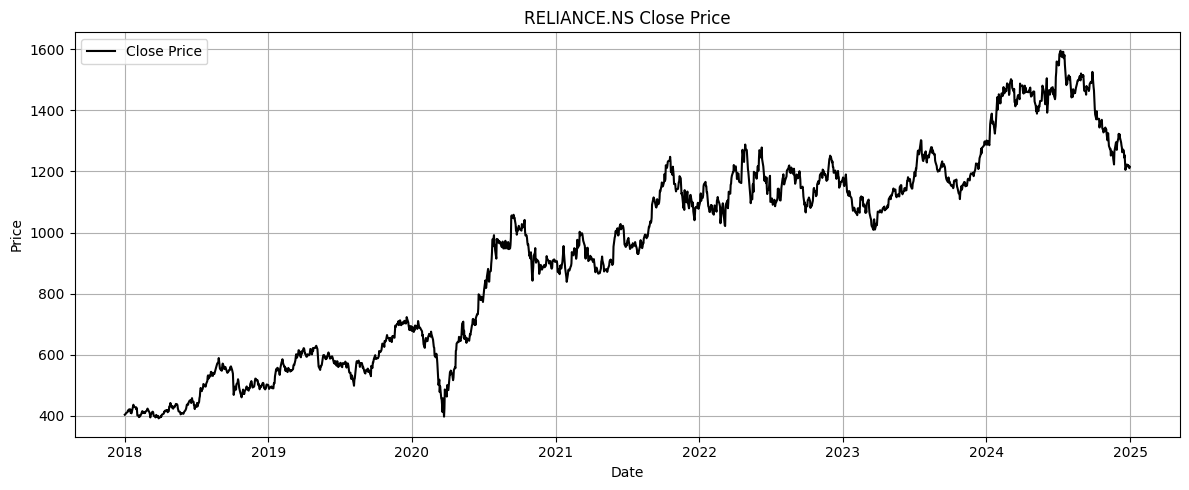

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price', color='black')
plt.title(f'{ticker} Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


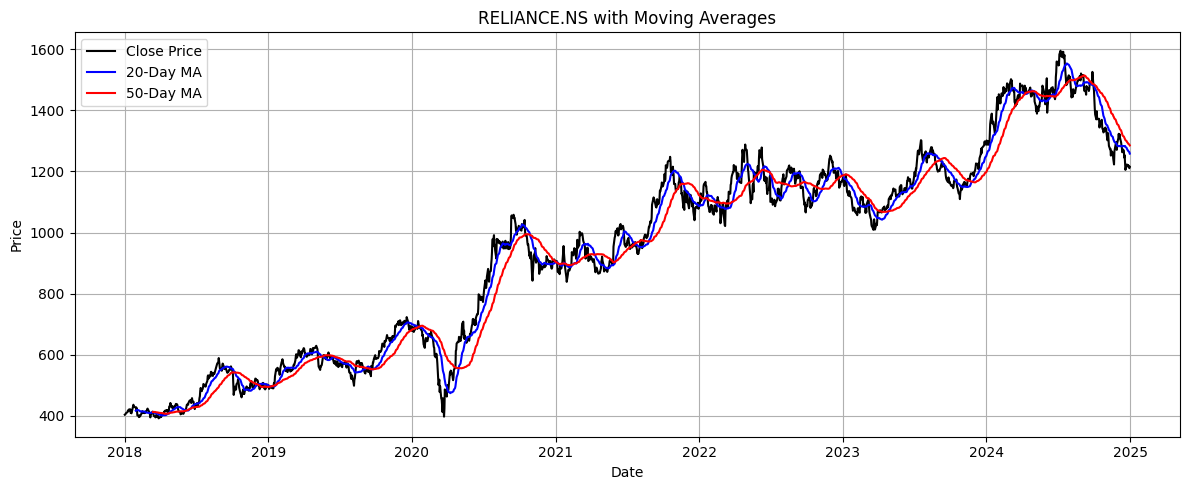

In [9]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['MA20'], label='20-Day MA', color='blue')
plt.plot(df['MA50'], label='50-Day MA', color='red')
plt.title(f'{ticker} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 3))
plt.bar(df.index, df['Volume'], color='purple')
plt.title(f'{ticker} Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


In [10]:
df.describe()

Price,Close,High,Low,Open,Volume,MA20,MA50
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,
count,1727.000000,1727.000000,1727.000000,1727.000000,1.727000e+03,1708.000000,1678.000000
mean,941.074443,951.351988,931.590367,941.780645,1.922102e+07,942.377513,944.051178
std,329.285708,331.652955,327.188470,329.462607,1.453412e+07,326.786566,322.390899
min,391.473297,397.305272,386.284401,388.945385,1.705656e+06,400.937445,406.305516
25%,598.344849,607.185418,591.894188,600.488464,1.076624e+07,595.796264,592.896623
50%,1002.488953,1015.190144,991.312669,1005.024449,1.496690e+07,995.190967,984.361836
75%,1184.108948,1194.264276,1172.783581,1184.117167,2.206175e+07,1183.474605,1168.588789
max,1595.484985,1603.358288,1580.137072,1599.022925,1.426834e+08,1553.862488,1515.272468


In [11]:
df.isnull().sum()


Price   Ticker     
Close   RELIANCE.NS     0
High    RELIANCE.NS     0
Low     RELIANCE.NS     0
Open    RELIANCE.NS     0
Volume  RELIANCE.NS     0
MA20                   19
MA50                   49
dtype: int64

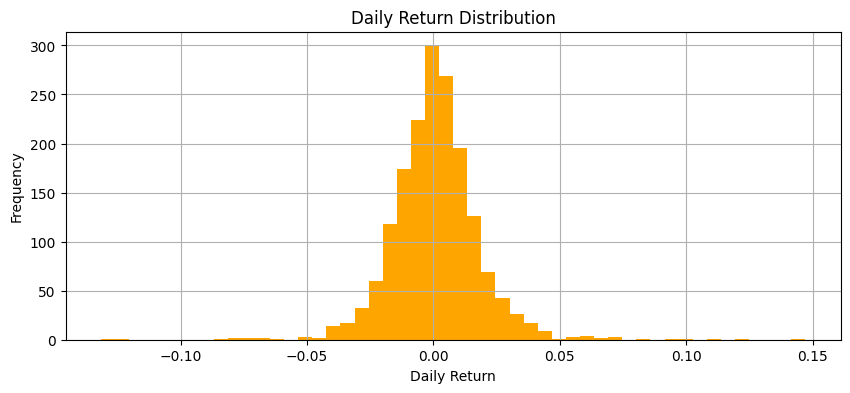

In [12]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 4))
df['Daily Return'].hist(bins=50, color='orange')
plt.title('Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


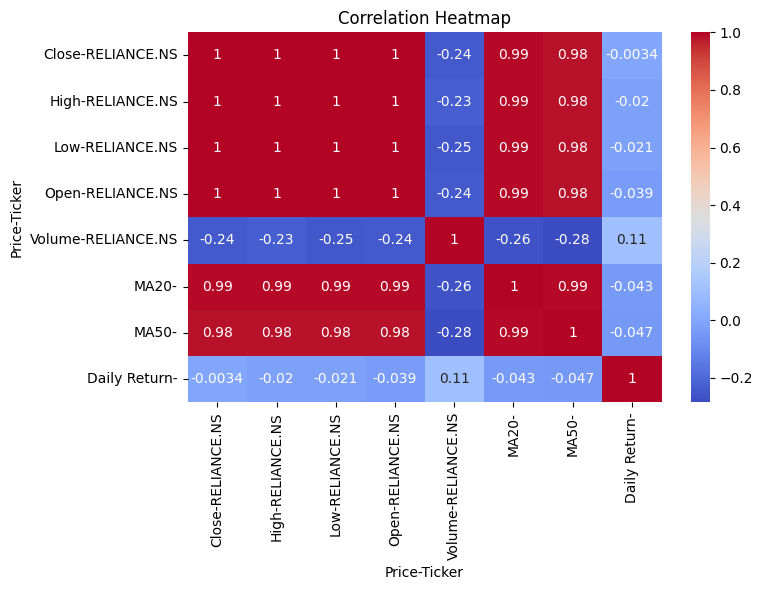

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


 ## 🔍 Summary

- The stock shows medium-term volatility with occasional strong trends.
- Moving averages indicate general trend direction and help smooth out noise.
- Volume can be used to detect trading activity spikes.
- Daily return analysis gives insights into risk/volatility.